## More Visualization
> Setting up your dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')

## Parsing information from the worksheet

In [14]:
# Parse cities worksheet and merge with main DataFrame
df_cities = xls.parse('cities')
df = pd.merge(left=df, right=df_cities, how='inner', left_on='city_id', right_on='id')

# Parse states worksheet and merge with main DataFrame
df_states = xls.parse('states')
df = pd.merge(left=df, right=df_states, how='inner', left_on='state_id', right_on='id')

## Histogram Overlay

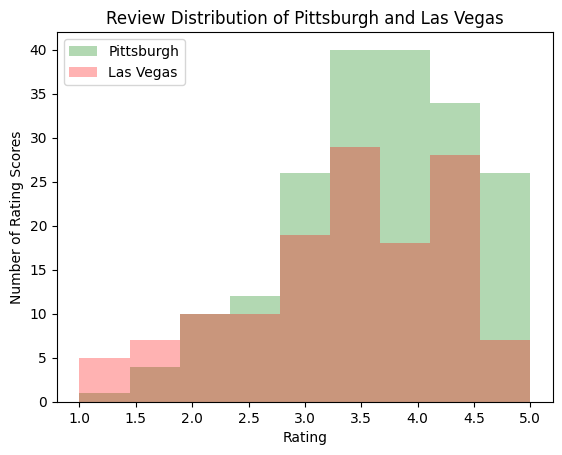

In [15]:
# Create DataFrames for specific cities
df_pitts = df[df['city'] == 'Pittsburgh']
df_vegas = df[df['city'] == 'Las Vegas']

# Extract star ratings
pitt_stars = df_pitts['stars']
vegas_stars = df_vegas['stars']

# Plot histograms overlay
plt.hist(pitt_stars, alpha=0.3, color='green', label='Pittsburgh', bins='auto')
plt.hist(vegas_stars, alpha=0.3, color='red', label='Las Vegas', bins='auto')
plt.xlabel("Rating")
plt.ylabel('Number of Rating Scores')
plt.legend(loc='best')
plt.title('Review Distribution of Pittsburgh and Las Vegas')
plt.show()

## Histogram 2

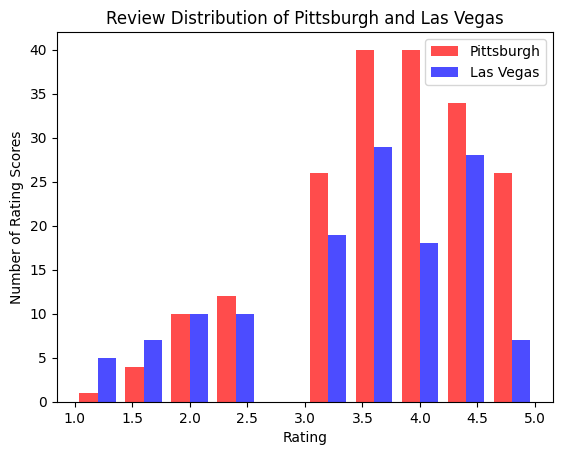

In [7]:
# Plot histograms side-by-side
plt.hist([pitt_stars, vegas_stars], alpha=0.7, color=['red', 'blue'], label=['Pittsburgh', 'Las Vegas'], bins='auto')
plt.xlabel("Rating")
plt.ylabel('Number of Rating Scores')
plt.legend(loc='best')
plt.title('Review Distribution of Pittsburgh and Las Vegas')
plt.show()

## Scatterplot

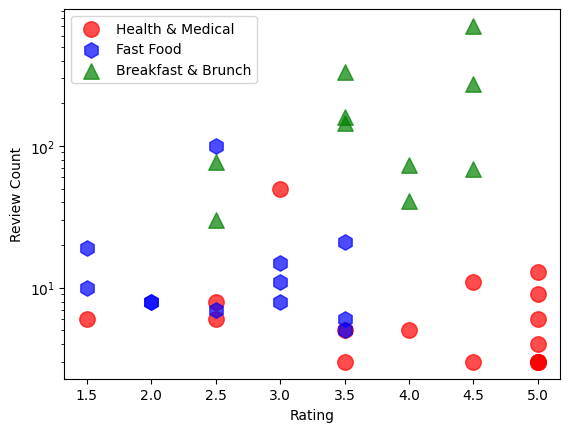

In [16]:
# Create DataFrames for specific categories
df_health = df[df["category_0"] == 'Health & Medical']
df_fast = df[df["category_0"] == 'Fast Food']
df_brunch = df[df["category_0"] == 'Breakfast & Brunch']

# Scatter plot for review counts vs. star ratings
plt.scatter(df_health['stars'], df_health['review_count'], marker='o', color='r', alpha=0.7, s=124, label="Health & Medical")
plt.scatter(df_fast['stars'], df_fast['review_count'], marker='h', color='b', alpha=0.7, s=124, label="Fast Food")
plt.scatter(df_brunch['stars'], df_brunch['review_count'], marker='^', color='g', alpha=0.7, s=124, label="Breakfast & Brunch")
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()

## Bar chart

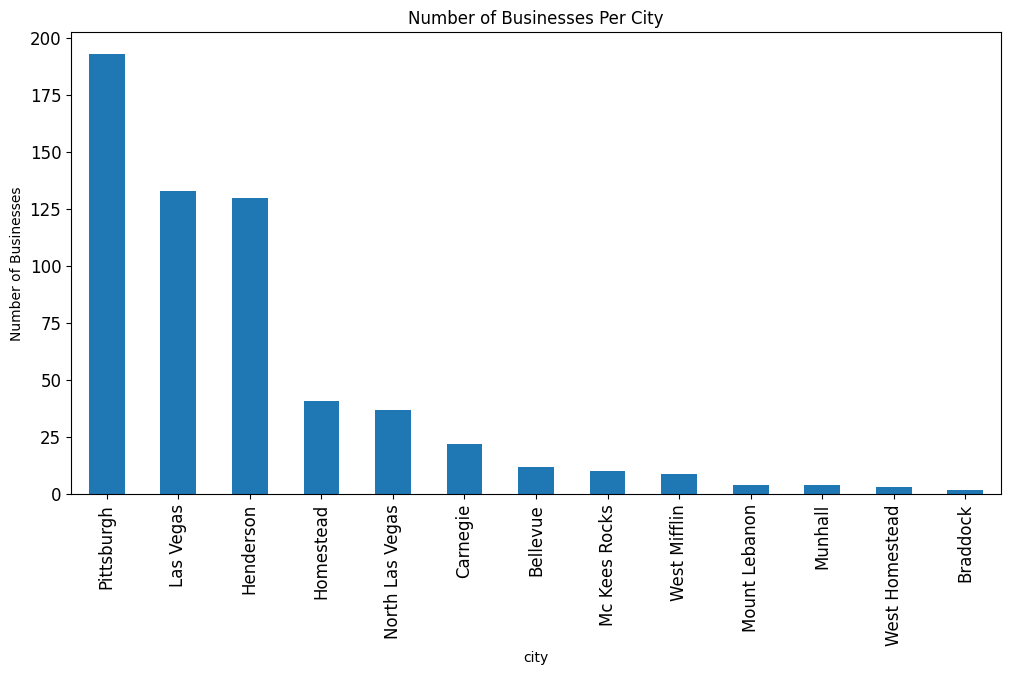

TypeError: agg function failed [how->mean,dtype->object]

In [17]:
# Bar chart for number of businesses per city
df_city_value_counts = df['city'].value_counts()
df_city_value_counts.plot(kind='bar', figsize=(12, 6), fontsize=12, title="Number of Businesses Per City")
plt.ylabel("Number of Businesses")
plt.show()

# Pivot table and bar chart for average star rating in bars and restaurants
bar_rest = df["category_0"].isin(["Bars", "Restaurants"])
df_bar_rest = df[bar_rest]
pivot_state_cat = pd.pivot_table(df_bar_rest, index=["category_0"])
pivot_state_cat = pivot_state_cat[["stars"]]
pivot_state_cat.plot(kind='bar', figsize=(12, 6), fontsize=12, title="Average Star Rating for Bars & Restaurants")
plt.xlabel("Category")
plt.ylabel("Average Star Rating")
plt.show()
